In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import csv

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/content


In [0]:
path = "/content/drive/My Drive/Datasets/EPL.csv"

In [0]:
data = pd.read_csv(path)

In [0]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39,1.60,1.56,4.20,3.92,8.05,7.06,38,2.12,2.03,1.85,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39,1.93,1.88,3.71,3.53,4.75,4.37,38,2.05,1.98,1.92,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39,2.60,2.47,3.49,3.35,3.05,2.92,38,2.00,1.95,1.96,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38,6.85,6.09,4.07,3.90,1.66,1.61,37,2.05,1.98,1.90,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39,4.01,3.83,3.57,3.40,2.12,2.05,38,2.10,2.01,1.88,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [0]:
data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,5.705263,4.552632,1.526316,1.684211,0.047368,0.076316,3.289184,4.583447,5.633763,3.142579,4.383447,5.205237,3.047526,4.295789,4.967132,3.229184,4.527026,5.584342,3.149395,4.368895,5.339579,3.325000,4.521395,5.815868,36.555263,3.444289,3.170289,4.719026,4.407263,6.099816,5.355868,34.339474,1.896816,1.828526,2.234421,2.126895,20.736842,-0.327632,2.025184,1.962447,2.002395,1.942053,3.332974,4.576342,5.620132
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,2.971718,2.730627,1.222844,1.209140,0.212706,0.275599,3.264296,1.944515,5.920971,2.892574,1.699503,5.133880,2.623373,1.512122,4.667690,3.000273,1.819129,5.760324,2.970813,1.713942,5.648228,3.318863,1.876364,6.541499,2.127741,3.594133,2.941928,2.081994,1.718748,7.163968,5.502668,2.012630,0.334501,0.309769,0.524738,0.467750,1.571249,1.056248,0.247373,0.230633,0.226581,0.215442,3.137394,2.019487,5.779454
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000,3.000000,1.120000,1.050000,3.000000,1.130000,1.070000,2.950000,1.120000,1.070000,3.040000,1.130000,1.050000,3.000000,1.120000,1.050000,3.000000,1.140000,32.000000,1.080000,1.060000,3.060000,2.970000,1.160000,1.130000,29.000000,1.240000,1.220000,1.500000,1.450000,17.000000,-3.000000,1.550000,1.500000,1.440000,1.400000,1.070000,2.930000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000,1.570000,3.500000,2.300000,1.570000,3.400000,2.250000,1.600000,3.400000,2.287500,1.590000,3.460000,2.330000,1.570000,3.400000,2.250000,1.600000,3.475000,2.300000,35.000000,1.642500,1.577500,3.520000,3.400000,2.400000,2.297500,33.000000,1.650000,1.600000,1.860000,1.797500,20.000000,-1.000000,1.830000,1.787500,1.817500,1.770000,1.595000,3.410000,2.335000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.300000,3.800000,3.400000,2.250000,3.700000,3.300000,2.250000,3.650000,3.300000,2.300000,3.815000,3.430000,2.250000,3.700000,3.275000,2.300000,3.800000,3.400000,36.000000,2.340000,2.270000,3.900000,3.725000,3.500000,3.325000,34.000000,1.850000,1.790000,2.120000,2.030000,21.000000,-0.250000,2.000000,1.930000,1.995000,1.940000,2.350000,3.765000,3.415000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000,3.250000,5.000000,6.500000,3.200000,4.750000,6.000000,3.150000,4.525000,5.525000,3.270000,4.857500,6.535000,3.200000,4.750000,6.000000,3.300000,4.800000,6.500000,38.000000,3.302500,3.190000,5.100000,4.775000,6.812500,6.187500,35.000000,2.100000,2.030000,2.450000,2.330000,22.000000,0.250000,2.190000,2.120000,2.152500,2.092500,3.380000,4.842500,6.565000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.0

In [0]:
def win(row):
  if (row["FTR"]=="A"):
    return row["AwayTeam"]
  elif (row["FTR"]=="H"):
    return row["HomeTeam"]
  elif (row["FTR"]=="D"):
    return None

def lose(row):
  if (row["FTR"]=="A"):
    return row["HomeTeam"]
  elif (row["FTR"]=="H"):
    return row["AwayTeam"]
  elif (row["FTR"]=="D"):
    return None

data["Winner"] = data.apply(win,axis=1)
data["Loser"] = data.apply(win,axis=1)

In [0]:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA', 'Winner', 'Loser'],
      dtype='object')

In [0]:
ref = data[['Date','HomeTeam','AwayTeam',"Referee",'HY','AY','HR','AR','Winner','FTR']].copy()

In [0]:
data_dummies = pd.get_dummies(ref["FTR"])
print("After one hot encoding: \n",list(data_dummies.columns))
ref = ref.join(data_dummies)

After one hot encoding: 
 ['A', 'D', 'H']


In [0]:
ref.head()

,Date,HomeTeam,AwayTeam,Referee,HY,AY,HR,AR,Winner,FTR,A,D,H
0,10/08/2018,Man United,Leicester,A Marriner,2,1,0,0,Man United,H,0,0,1
1,11/08/2018,Bournemouth,Cardiff,K Friend,1,1,0,0,Bournemouth,H,0,0,1
2,11/08/2018,Fulham,Crystal Palace,M Dean,1,2,0,0,Crystal Palace,A,1,0,0
3,11/08/2018,Huddersfield,Chelsea,C Kavanagh,2,1,0,0,Chelsea,A,1,0,0
4,11/08/2018,Newcastle,Tottenham,M Atkinson,2,2,0,0,Tottenham,A,1,0,0


In [0]:
ref.groupby('Referee').sum()

,HY,AY,HR,AR,A,D,H
Referee,,,,,,,
A Madley,0,2,0,0,0,0,2
A Marriner,31,42,2,1,10,7,10
A Taylor,57,45,0,1,6,6,20
C Kavanagh,39,35,1,1,5,5,14
C Pawson,46,46,1,6,15,4,7
D Coote,16,19,0,0,2,2,7
G Scott,14,24,0,1,1,3,13
J Moss,44,49,3,2,8,2,17
K Friend,48,44,2,1,9,6,12


In [0]:
ref["Referee"].value_counts()

A Taylor      32
M Oliver      30
M Atkinson    29
M Dean        29
J Moss        27
A Marriner    27
K Friend      27
C Pawson      26
P Tierney     24
C Kavanagh    24
S Attwell     20
L Mason       19
L Probert     18
G Scott       17
D Coote       11
R East        10
S Hooper       8
A Madley       2
Name: Referee, dtype: int64

In [0]:
vc = ref["Referee"].value_counts()
u  = [i not in set(vc[vc==1].index) for i in ref["Referee"]]
ref= ref[u]

### A Medley has only officiated two matches, therefore he will be removed as we wouldnt be able to observe a trend from him

In [0]:
ref = ref[ref.Referee != "A Madley"]

### Yellow cards per Referee

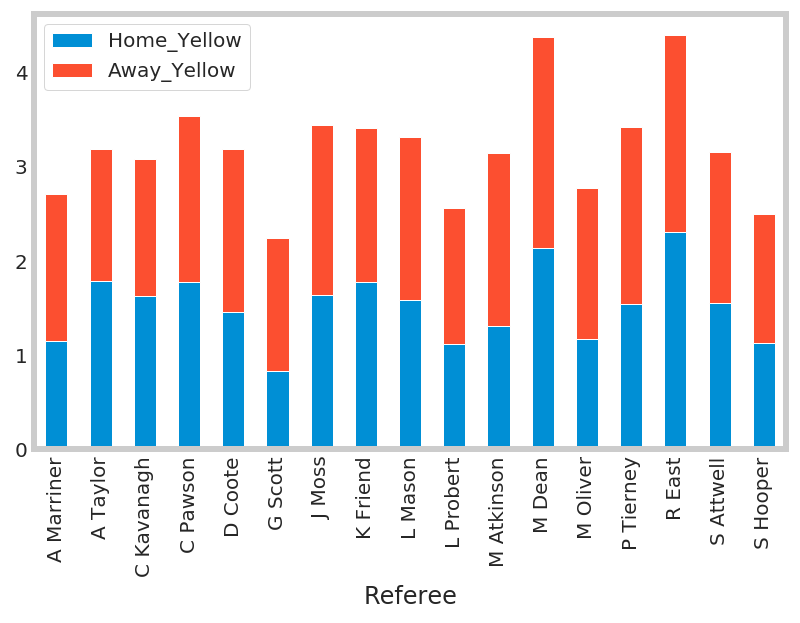

In [0]:
ref["Home_Yellow"] = ref["HY"]
ref["Away_Yellow"]  = ref["AY"] 
HomeYellow = ref.groupby("Referee").Home_Yellow.mean()
AwayaYellow = ref.groupby("Referee").Away_Yellow.mean()
Y = pd.concat([HomeYellow, AwayaYellow], axis=1)
Y.plot(kind='bar', stacked=True)
plt.grid(False)

### Red cards per Referee

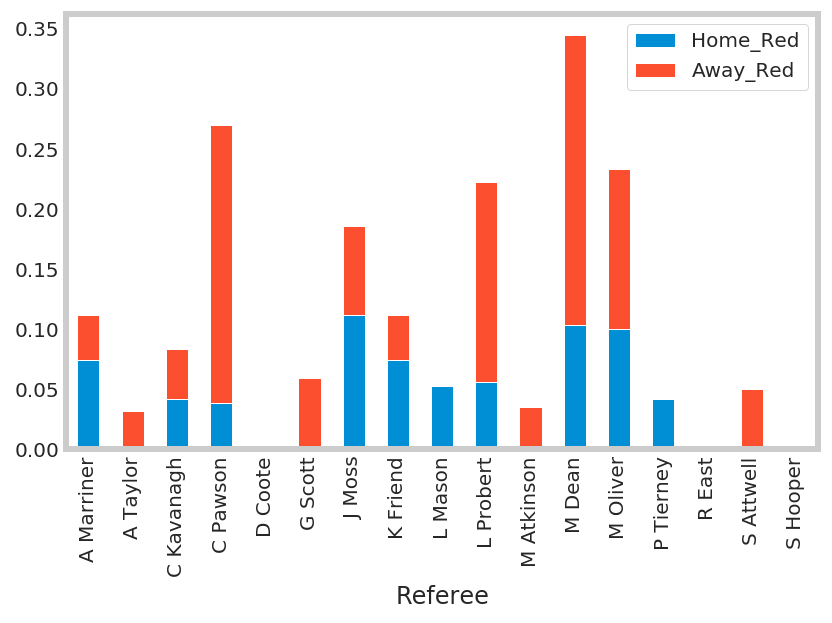

In [0]:
ref["Home_Red"] = ref["HR"]
ref["Away_Red"]  = ref["AR"]
HR = ref.groupby("Referee").Home_Red.mean()
AR = ref.groupby("Referee").Away_Red.mean()
R = pd.concat([HR, AR], axis=1)
R.plot(kind='bar', stacked=True)
plt.grid(False)

### Percentage of Win per Referee

Text(0, 0.5, '%')

<Figure size 3600x720 with 0 Axes>

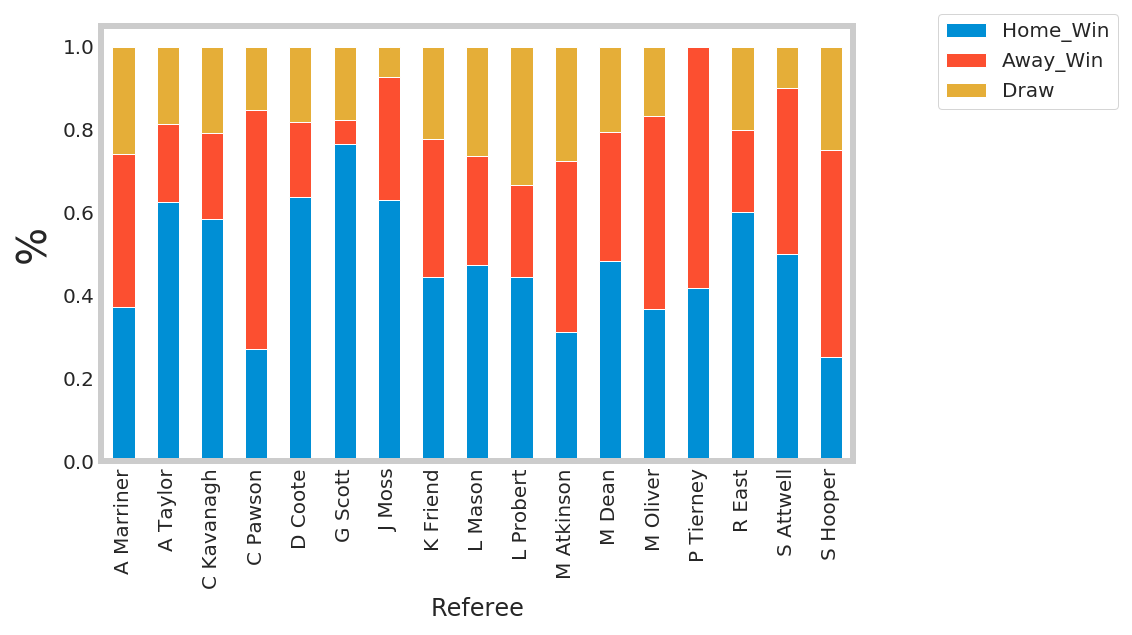

In [0]:
ref["Home_Win"] = ref["H"]
ref["Away_Win"]  = ref["A"]
ref["Draw"]  = ref["D"]
refhomewin = ref.groupby("Referee").Home_Win.mean()
refawaywin = ref.groupby("Referee").Away_Win.mean()
refdraw = ref.groupby("Referee").Draw.mean()
d = pd.concat([refhomewin, refawaywin, refdraw], axis=1)
plt.figure(figsize=(50,10))
d.plot(kind='bar', stacked=True)
plt.legend (prop = {"size":15})
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.grid(False)
plt.ylabel('%', fontsize=20)

In [0]:
data_dummies = pd.get_dummies(data["FTR"])
print ("Features after One-Hot Encoding: \n", list(data_dummies.columns))
data = data.join(data_dummies)

Features after One-Hot Encoding: 
 ['A', 'D', 'H']


In [0]:
hw = data.groupby("HomeTeam").H.mean()
hw = hw.reset_index()
hw = hw.rename(columns = {'H':"HomeWin%"})
aw = data.groupby("AwayTeam").A.mean()
aw = aw.reset_index()
aw = aw.rename(columns = {'A':"AwayWin%"})

In [0]:
hw

,HomeTeam,HomeWin%
0,Arsenal,0.736842
1,Bournemouth,0.421053
2,Brighton,0.315789
3,Burnley,0.368421
4,Cardiff,0.315789
5,Chelsea,0.631579
6,Crystal Palace,0.263158
7,Everton,0.526316
8,Fulham,0.315789
9,Huddersfield,0.105263


In [0]:
aw

,AwayTeam,AwayWin%
0,Arsenal,0.368421
1,Bournemouth,0.263158
2,Brighton,0.157895
3,Burnley,0.210526
4,Cardiff,0.210526
5,Chelsea,0.473684
6,Crystal Palace,0.473684
7,Everton,0.263158
8,Fulham,0.052632
9,Huddersfield,0.052632


In [0]:
win = pd.concat([hw,aw],axis=1)
win = win.drop(["AwayTeam"],axis=1)
win = win.rename(columns = {'HomeTeam':"Team"})


In [0]:
win.head()

,Team,HomeWin%,AwayWin%
0,Arsenal,0.736842,0.368421
1,Bournemouth,0.421053,0.263158
2,Brighton,0.315789,0.157895
3,Burnley,0.368421,0.210526
4,Cardiff,0.315789,0.210526


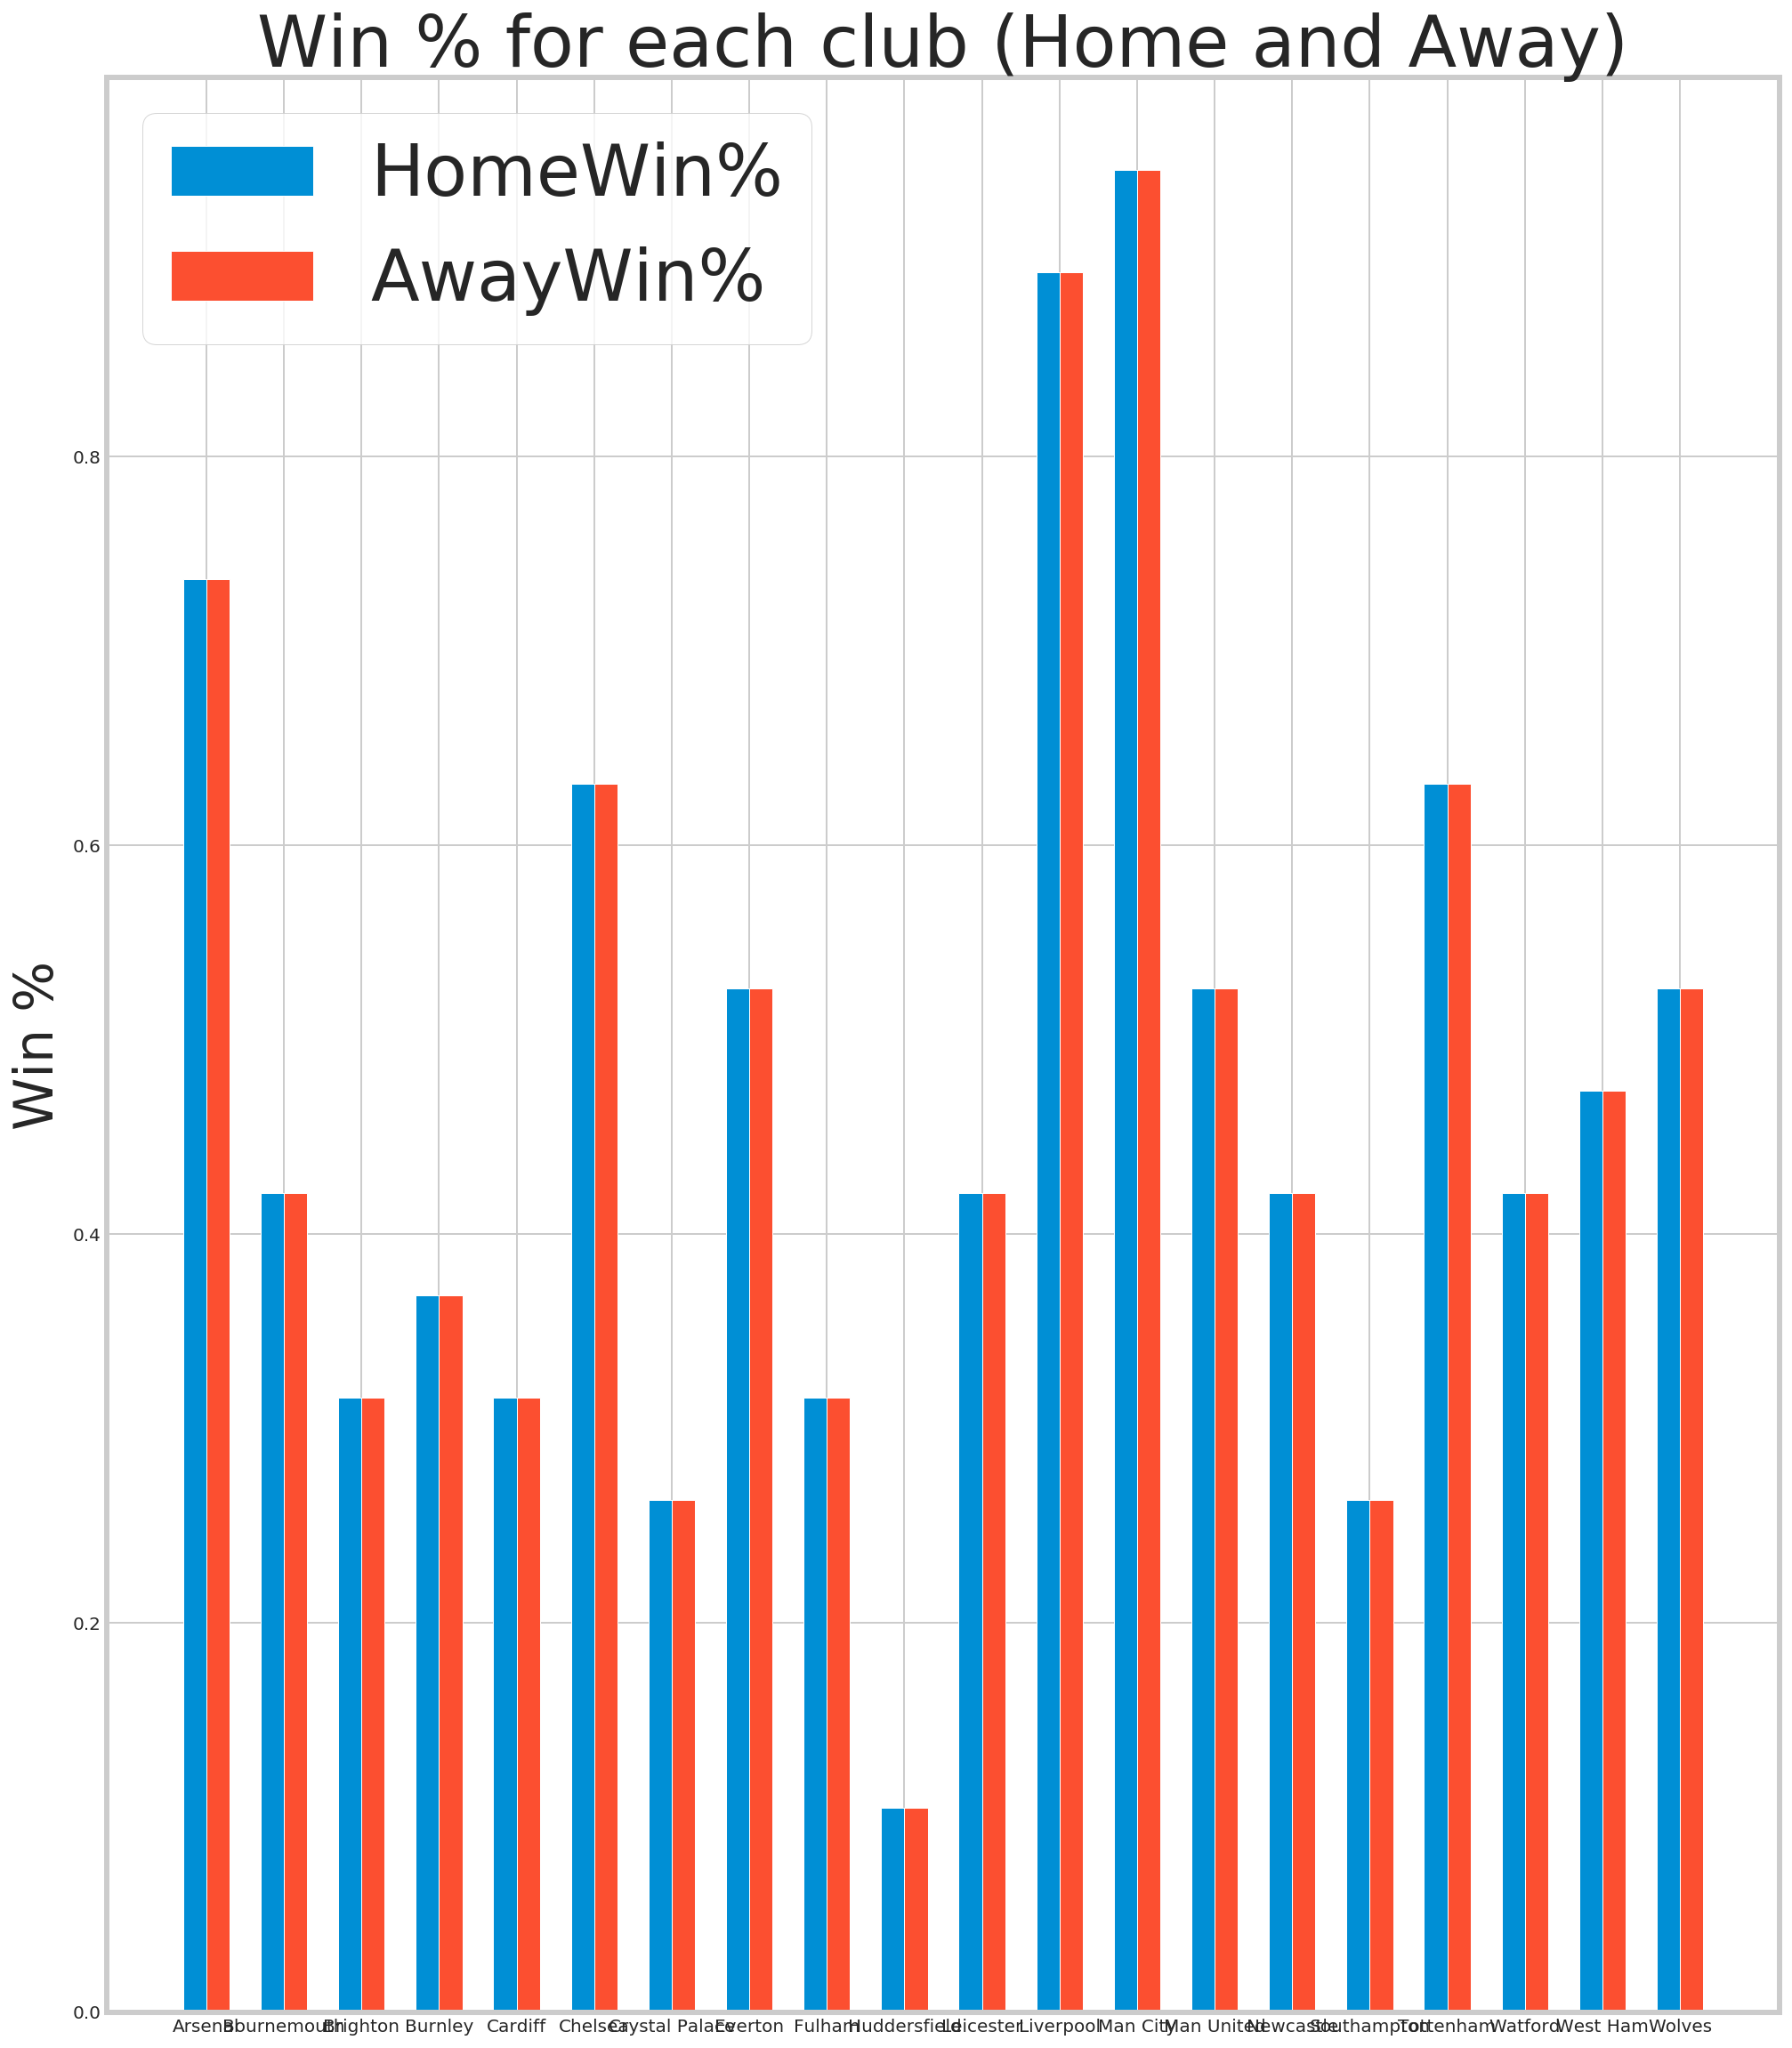

In [0]:
plt.figure(figsize=(15,20))
N = 20
homewin_per = win["HomeWin%"]
awaywin_per = win["AwayWin%"]

ind = np.arange(N)
width = 0.3
plt.bar(ind,homewin_per,width,label='HomeWin%')
plt.bar(ind+width,homewin_per,width,label='AwayWin%')
plt.ylabel('Win %',fontsize=30)
plt.title('Win % for each club (Home and Away)',fontsize=40)
plt.xticks(ind+width/2,(win["Team"]))
plt.legend(loc='best',prop={"size":40})
plt.show()
